<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

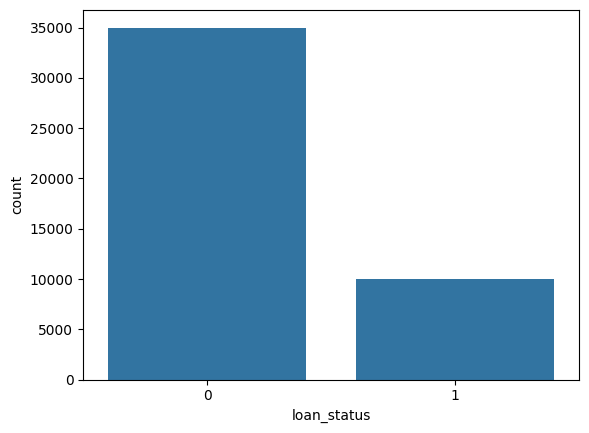

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\mfaro\Downloads\Compressed\archive_4\loan_data.csv")

df.head()
df.info()
df.isnull().sum()

sns.countplot(x="loan_status", data=df)
plt.show()


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    df = df.copy()
    df.fillna(method="ffill", inplace=True)

    for col in df.select_dtypes(include="object").columns:
        df[col] = LabelEncoder().fit_transform(df[col])

    return df


In [7]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

df = pd.read_csv(r"C:\Users\mfaro\Downloads\Compressed\archive_4\loan_data.csv")
df = preprocess_data(df)

X = df.drop("loan_status", axis=1)
y = df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6
)

model.fit(X_train, y_train)
joblib.dump(model, "model.pkl")

print("Model trained and saved!")


C:\Users\mfaro\AppData\Local\Temp\ipykernel_6220\914741909.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


Model trained and saved!


In [8]:
import joblib
import pandas as pd

model = joblib.load("model.pkl")

def predict_loan(data):
    df = pd.DataFrame([data])
    return int(model.predict(df)[0])
